Ce notebook a pour objectif de faire quelques statistiques descriptives sur le dataframe DVF pour mieux visualiser les données et ensuite, de le coupler aux données de risques d'inondation pour avoir une base de données complète.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Partie 1 : Une première analyse

Tout de suite, nous allons observer rapidement le dataframe pour voir s'il y a des données manquantes et/ou des choses à corriger/ajouter

In [2]:
import pandas as pd

def charger_donnees(chemin_fichier):
    """
    Charge un fichier CSV dans un DataFrame pandas.
    :param chemin_fichier: Chemin du fichier CSV
    :return: DataFrame contenant les données du CSV
    """
    df = pd.read_csv(chemin_fichier)
    df['nombre_dependances'] = df['nombre_dependances'].fillna(0)
    return df

df_initial = charger_donnees("/home/onyxia/projet_statapp_inondations/DVFfinal.csv")


Ci-dessus, en chargeant la BDD, j'ai remplacé les NaN par des 0 dans la colonne des dépendances.

In [3]:

def statistiques_generales(df):
    """
    Renvoie des statistiques générales sur le DataFrame.
    :param df: DataFrame contenant les données
    :return: DataFrame avec les statistiques descriptives
    """
    return df.describe()

statistiques_generales(df_initial)

,Unnamed: 0,numero_disposition,valeur_fonciere,adresse_numero,code_postal,code_departement,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,prix_maison,nombre_dependances
count,115303.000000,115303.000000,1.152340e+05,114491.000000,115301.000000,115303.000000,115303.000000,115303.000000,115301.000000,113927.000000,113927.000000,1.152340e+05,115303.000000
mean,57651.000000,1.016131,2.898613e+05,895.889563,27535.861979,27.157264,99.266134,4.013087,589.264542,3.538192,43.570904,2.462188e+05,0.373208
std,33285.253381,0.136616,5.330753e+05,2095.946129,9338.339226,9.284346,44.053883,1.392382,2071.198546,0.737078,0.335817,2.637019e+05,1.186953
min,0.000000,1.000000,1.000000e+00,1.000000,11000.000000,11.000000,1.000000,0.000000,1.000000,1.705680,42.714337,4.405286e-02,0.000000
25%,28825.500000,1.000000,1.340000e+05,7.000000,30000.000000,30.000000,74.000000,3.000000,140.000000,3.038340,43.303353,1.210000e+05,0.000000
50%,57651.000000,1.000000,2.200000e+05,21.000000,30650.000000,30.000000,92.000000,4.000000,374.000000,3.603772,43.567320,2.100000e+05,0.000000
75%,86476.500000,1.000000,3.288000e+05,170.000000,34350.000000,34.000000,118.000000,5.000000,607.000000,4.132948,43.818203,3.150000e+05,0.000000
max,115302.000000,8.000000,4.199893e+07,9999.000000,34990.000000,34.000000,1340.000000,70.000000,68438.000000,4.832846,44.444393,4.199893e+07,160.000000


L'analyse ci-dessus n'a de sens que pour certaines variables. En particulier, la moyenne des codes postal n'a pas vraiment d'intérêt (ni même de sens...)


On remarque que le nombre maximal de dépendances est 160, cela semble étonnamment grand. Plus de 75% des transactions n'impliquent pas de dépendance


On voit ici l'importance d'exclure les valeurs extrêmes : On a une transaction à 4 centimes (?) et une autre dont la surface est 1 m². Ces transactions exceptionnelles n'apportent rien à l'analyse mais pourraient induire en erreur nos résultats.

In [4]:
df_initial.head(10)

,Unnamed: 0,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,nom_commune,code_departement,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,prix_maison,nombre_dependances
0,0,2019-202011,2019-07-01,1,Vente,161000.00,15.0,NaN,RUE PAUL GAUGUIN,0114,30620.0,Aubord,30,80.0,3.0,203.0,4.316416,43.759404,1.610000e+05,0.0
1,1,2019-202020,2019-07-04,1,Vente,539920.00,1781.0,NaN,RTE DE SAUVE,0136,30730.0,Parignargues,30,100.0,4.0,319.0,4.195975,43.859824,2.203755e+05,0.0
2,2,2019-202020,2019-07-04,1,Vente,539920.00,1781.0,NaN,RTE DE SAUVE,0136,30730.0,Parignargues,30,60.0,3.0,319.0,4.195975,43.859824,1.322253e+05,0.0
3,3,2019-202020,2019-07-04,1,Vente,539920.00,1821.0,NaN,RTE DE SAUVE,0136,30730.0,Parignargues,30,85.0,3.0,1533.0,4.195750,43.859556,1.873192e+05,0.0
4,4,2019-202021,2019-07-01,1,Vente,99000.00,5264.0,NaN,LA BOUISSONADE ET MONBLADI,B054,30750.0,Lanuéjols,30,84.0,3.0,2480.0,NaN,NaN,9.900000e+04,0.0
5,5,2019-202026,2019-07-01,1,Vente,228222.00,122.0,NaN,RTE DE MARIGNAC,0154,30700.0,Foissac,30,90.0,4.0,902.0,4.300402,44.045759,2.282220e+05,0.0
6,6,2019-202027,2019-07-01,1,Vente,380500.00,9.0,NaN,IMP DES SALADELLES,0465,30220.0,Aigues-Mortes,30,115.0,4.0,524.0,4.199704,43.572632,3.805000e+05,0.0
7,7,2019-202036,2019-07-05,1,Vente,1119600.00,2.0,NaN,IMP DE LA PHALENE,6169,30900.0,Nîmes,30,265.0,6.0,2106.0,4.296259,43.834871,1.119600e+06,1.0
8,8,2019-202045,2019-07-04,1,Vente,420800.25,10.0,NaN,CHE DU CIMETIERE VIEUX,0105,30980.0,Saint-Dionisy,30,108.0,3.0,772.0,4.228319,43.802425,4.208002e+05,0.0
9,9,2019-202047,2019-07-02,1,Vente,176000.00,5288.0,NaN,CHE DU MAS DE PIAN,0072,30350.0,Moulézan,30,85.0,4.0,499.0,4.124116,43.927754,1.760000e+05,0.0


In [5]:
def valeurs_manquantes(df):
    """
    Renvoie le nombre de valeurs manquantes par colonne.
    :param df: DataFrame contenant les données
    :return: Série avec le nombre de valeurs manquantes par colonne
    """
    return df.isnull().sum()


valeurs_manquantes(df_initial)

Unnamed: 0                        0
id_mutation                       0
date_mutation                     0
numero_disposition                0
nature_mutation                   0
valeur_fonciere                  69
adresse_numero                  812
adresse_suffixe              106905
adresse_nom_voie                  1
adresse_code_voie                 0
code_postal                       2
nom_commune                       0
code_departement                  0
surface_reelle_bati               0
nombre_pieces_principales         0
surface_terrain                   2
longitude                      1376
latitude                       1376
prix_maison                      69
nombre_dependances                0
dtype: int64

In [ ]:
Ci-dessus, on voit que les coordonnées GPS sont manquantes pour 1376 transactions,
il semble pertinent de les supprimer de la base car on ne pourra pas les étudier correctement (de même que les 69 transactions où le prix de vente est indisponible)

In [16]:
def mode_colonnes(df):
    """
    Renvoie le mode (valeur la plus fréquente) de chaque colonne.
    :param df: DataFrame contenant les données
    :return: Série avec le mode de chaque colonne
    """
    return df.mode().iloc[0]


mode_colonnes(df_initial)

Unnamed: 0                             0
id_mutation                  2021-132350
date_mutation                 2021-07-28
numero_disposition                   1.0
nature_mutation                    Vente
valeur_fonciere                 200000.0
adresse_numero                       1.0
adresse_suffixe                        B
adresse_nom_voie              LE VILLAGE
adresse_code_voie                   0020
code_postal                      34500.0
nom_commune                        Nîmes
code_departement                    34.0
surface_reelle_bati                 90.0
nombre_pieces_principales            4.0
surface_terrain                    500.0
longitude                       3.049139
latitude                       43.013674
prix_maison                     200000.0
nombre_dependances                   0.0
Name: 0, dtype: object

## Partie 2 : Un premier nettoyage

On vient de voir qu'il est nécessaire de supprimer certaines observations avant de pouvoir analyser plus précisément notre BDD. Ici, on va s'occuper de supprimer les observations où une information importante est indisponible. De même, on va rajouter la colonne prix_par_metre_carre qui nous servira de variables de références pour supprimer les observations atypiques.

In [8]:
def supprimer_lignes_vides(df):
    """
    Supprime les lignes où les variables prix_maison ou longitude ne sont pas définies.
    :param df: DataFrame contenant les données
    :return: DataFrame sans les lignes avec prix_maison ou longitude manquantes
    """
    df = df.dropna(subset=['prix_maison', 'longitude', 'surface_terrain'])
    return df

df_sans_vide = supprimer_lignes_vides(df_initial)

valeurs_manquantes(df_sans_vide)


Unnamed: 0                        0
id_mutation                       0
date_mutation                     0
numero_disposition                0
nature_mutation                   0
valeur_fonciere                   0
adresse_numero                  801
adresse_suffixe              105526
adresse_nom_voie                  1
adresse_code_voie                 0
code_postal                       2
nom_commune                       0
code_departement                  0
surface_reelle_bati               0
nombre_pieces_principales         0
surface_terrain                   0
longitude                         0
latitude                          0
prix_maison                       0
nombre_dependances                0
dtype: int64

In [11]:
def creer_prix_par_metre_carre(df):
    """
    Crée une variable prix_par_metre_carre en divisant le prix_maison par la surface du terrain.
    :param df: DataFrame contenant les données
    :return: DataFrame avec la colonne prix_par_metre_carre ajoutée
    """
    df['prix_par_metre_carre'] = df['prix_maison'] / df['surface_terrain']
    return df

df_sans_vide = creer_prix_par_metre_carre(df_sans_vide)

df_sans_vide.head()

/tmp/ipykernel_45941/247320998.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prix_par_metre_carre'] = df['prix_maison'] / df['surface_terrain']


,Unnamed: 0,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,...,nom_commune,code_departement,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,prix_maison,nombre_dependances,prix_par_metre_carre
0,0,2019-202011,2019-07-01,1,Vente,161000.0,15.0,NaN,RUE PAUL GAUGUIN,0114,...,Aubord,30,80.0,3.0,203.0,4.316416,43.759404,161000.000000,0.0,793.103448
1,1,2019-202020,2019-07-04,1,Vente,539920.0,1781.0,NaN,RTE DE SAUVE,0136,...,Parignargues,30,100.0,4.0,319.0,4.195975,43.859824,220375.510204,0.0,690.832320
2,2,2019-202020,2019-07-04,1,Vente,539920.0,1781.0,NaN,RTE DE SAUVE,0136,...,Parignargues,30,60.0,3.0,319.0,4.195975,43.859824,132225.306122,0.0,414.499392
3,3,2019-202020,2019-07-04,1,Vente,539920.0,1821.0,NaN,RTE DE SAUVE,0136,...,Parignargues,30,85.0,3.0,1533.0,4.195750,43.859556,187319.183673,0.0,122.191248
5,5,2019-202026,2019-07-01,1,Vente,228222.0,122.0,NaN,RTE DE MARIGNAC,0154,...,Foissac,30,90.0,4.0,902.0,4.300402,44.045759,228222.000000,0.0,253.017738


## Partie 3 : Une deuxième analyse

In [17]:
def distribution_valeurs(df, colonne):
    """
    Renvoie la distribution des valeurs uniques d'une colonne.
    :param df: DataFrame contenant les données
    :param colonne: Nom de la colonne à analyser
    :return: Série avec la distribution des valeurs uniques
    """
    if colonne in df.columns:
        return df[colonne].value_counts()
    else:
        return f"La colonne '{colonne}' n'existe pas dans le DataFrame."

distribution_valeurs(df_initial, "prix_maison")

prix_maison
2.000000e+05    948
1.500000e+05    937
1.800000e+05    802
1.200000e+05    792
1.000000e+05    786
               ... 
5.074450e+05      1
1.208000e+06      1
8.455724e+04      1
3.949500e+05      1
5.378300e+05      1
Name: count, Length: 29915, dtype: int64

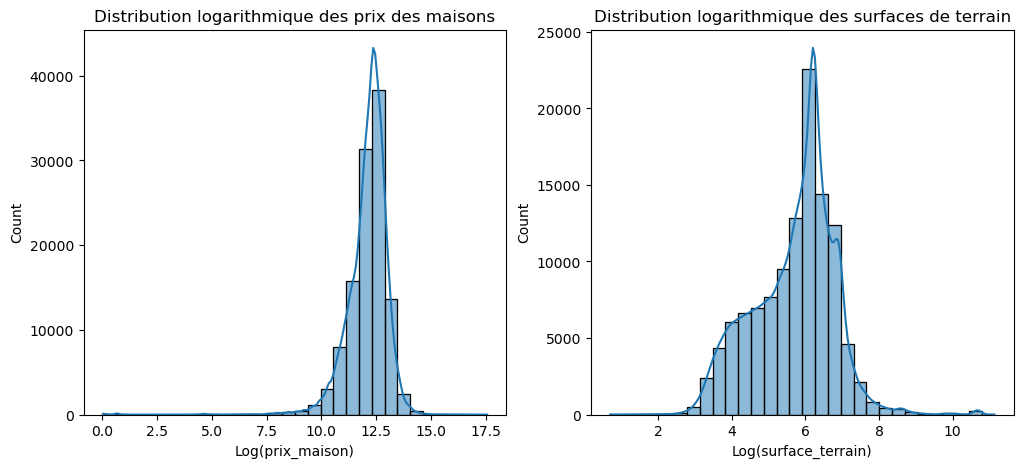

In [28]:
def visualiser_distributions(df):
    """
    Affiche des graphiques de distribution pour les variables prix_maison et surface_terrain.
    :param df: DataFrame contenant les données
    """
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(np.log1p(df['prix_maison']), bins=30, kde=True)
    plt.title("Distribution logarithmique des prix des maisons")
    plt.xlabel("Log(prix_maison)")
    
    plt.subplot(1, 2, 2)
    sns.histplot(np.log1p(df['surface_terrain']), bins=30, kde=True)
    plt.title("Distribution logarithmique des surfaces de terrain")
    plt.xlabel("Log(surface_terrain)")
    
    plt.show()

visualiser_distributions(df_initial)


In [ ]:
def filtrer_par_departement_et_commune(df, departement=None, commune=None):
    """
    Filtre le DataFrame par département et/ou commune.
    :param df: DataFrame contenant les données
    :param departement: Code du département (facultatif)
    :param commune: Nom de la commune (facultatif)
    :return: DataFrame filtré
    """
    if departement:
        df = df[df['code_departement'] == departement]
    if commune:
        df = df[df['nom_commune'] == commune]
    return df